NPACutoff54v01 - STATISTICAL CUTOFF ANALYSIS - 2025-05-29 16:03:55
Changed from programs/ to project root
Loading complete window ranking data...
✅ Complete window data loaded
Total windows analyzed: 50
NPA count range: 7 - 206

📊 BASIC STATISTICS:
Mean NPAs per window: 25.300
Std deviation: 38.441
Median NPAs: 10.0

📈 PERCENTILE ANALYSIS:
90.00th percentile: 36.0 NPAs
95.00th percentile: 113.8 NPAs
99.00th percentile: 174.6 NPAs
99.50th percentile: 190.3 NPAs
99.90th percentile: 202.9 NPAs
99.95th percentile: 204.4 NPAs
99.99th percentile: 205.7 NPAs

🎯 POISSON MODEL ANALYSIS:
Baseline rate (≤4 NPAs): 1.000
Cutoff | P(X≥cutoff) | Expected false positives
--------------------------------------------------
     5 | 3.66e-03 | 0.2
     6 | 5.94e-04 | 0.0
     7 | 8.32e-05 | 0.0
     8 | 1.02e-05 | 0.0
     9 | 1.13e-06 | 0.0
    10 | 1.11e-07 | 0.0
    11 | 1.00e-08 | 0.0
    12 | 8.32e-10 | 0.0
    13 | 6.36e-11 | 0.0
    14 | 4.52e-12 | 0.0
    15 | 3.00e-13 | 0.0
    16 | 1.87e-14 | 0

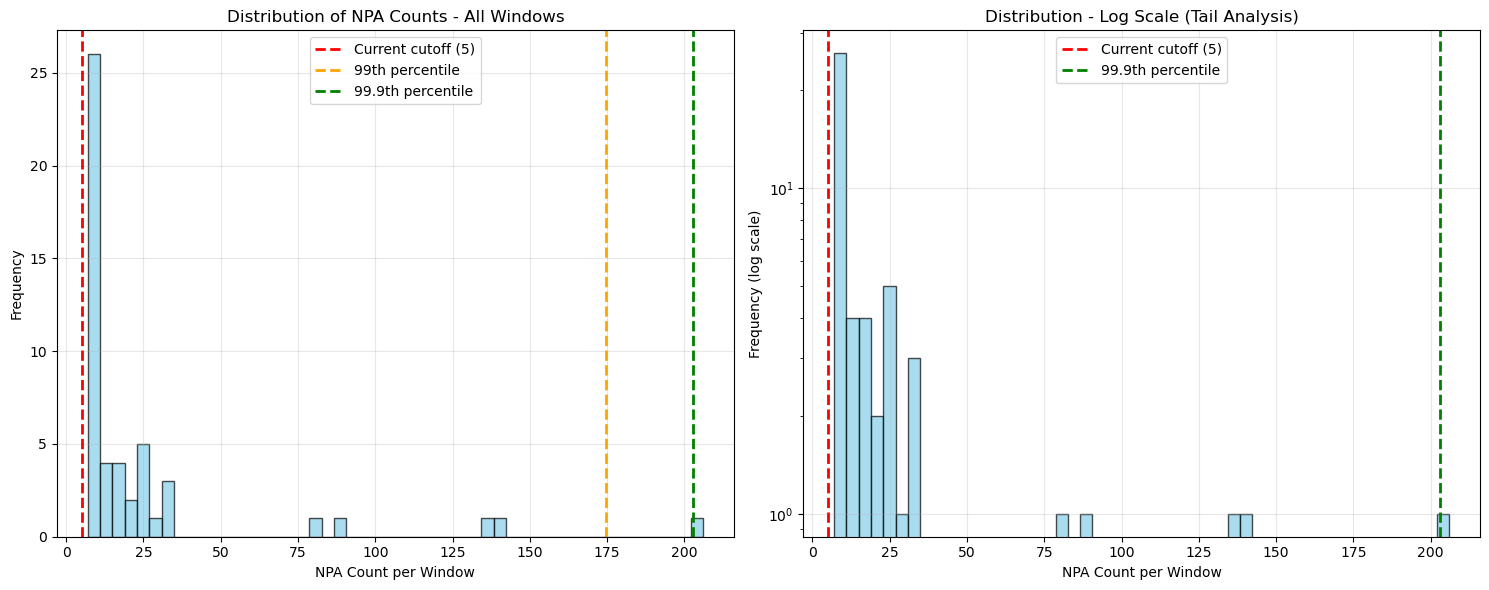


📊 FAMILY COUNTS AT DIFFERENT CUTOFFS:
Cutoff | Families | % of 581 | Expected false positives
------------------------------------------------------------
     5 |       21 |   3.61% | 0.2
     7 |       21 |   3.61% | 0.0
     8 |       17 |   2.93% | 0.0
    10 |       11 |   1.89% | 0.0
    12 |        7 |   1.20% | 0.0
    15 |        7 |   1.20% | 0.0
    20 |        5 |   0.86% | 0.0

🎯 FINAL RECOMMENDATION:
Use 5 NPAs as cutoff (p < 0.001)
This should reduce false positives significantly
Current 5 NPA cutoff is likely too permissive

✅ NPACutoff54v01 complete - Statistical analysis done!


In [1]:
# NPACutoff54v01 - Statistical analysis to determine proper NPA cutoff
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats

print(f"NPACutoff54v01 - STATISTICAL CUTOFF ANALYSIS - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Directory setup
current_dir = os.getcwd()
if 'programs' in current_dir:
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print("Changed from programs/ to project root")

# Load the complete window ranking data
print("Loading complete window ranking data...")
try:
    with open("outputs/window_ranking_COMPLETE_103602.json", 'r') as f:
        ranking_data = json.load(f)
    print("✅ Complete window data loaded")
except FileNotFoundError:
    print("❌ ERROR: Complete window ranking file not found")
    exit()

# Extract ALL NPA counts (not just top 50)
all_windows = ranking_data.get('all_windows', ranking_data.get('top_50_windows', []))
npa_counts = [window['npa_count'] for window in all_windows]

print(f"Total windows analyzed: {len(npa_counts)}")
print(f"NPA count range: {min(npa_counts)} - {max(npa_counts)}")

# Basic statistics
mean_npa = np.mean(npa_counts)
std_npa = np.std(npa_counts)
median_npa = np.median(npa_counts)

print(f"\n📊 BASIC STATISTICS:")
print(f"Mean NPAs per window: {mean_npa:.3f}")
print(f"Std deviation: {std_npa:.3f}")
print(f"Median NPAs: {median_npa:.1f}")

# Calculate percentiles
percentiles = [90, 95, 99, 99.5, 99.9, 99.95, 99.99]
print(f"\n📈 PERCENTILE ANALYSIS:")
for p in percentiles:
    value = np.percentile(npa_counts, p)
    print(f"{p:5.2f}th percentile: {value:.1f} NPAs")

# Poisson analysis (assuming baseline rate)
baseline_counts = [c for c in npa_counts if c <= 4]  # Current "baseline"
baseline_rate = np.mean(baseline_counts) if baseline_counts else 1.0

print(f"\n🎯 POISSON MODEL ANALYSIS:")
print(f"Baseline rate (≤4 NPAs): {baseline_rate:.3f}")

# Calculate Poisson probabilities
cutoff_candidates = range(5, 21)
print(f"Cutoff | P(X≥cutoff) | Expected false positives")
print("-" * 50)

total_windows = len(npa_counts)
for cutoff in cutoff_candidates:
    p_value = 1 - stats.poisson.cdf(cutoff-1, baseline_rate)
    expected_fps = p_value * total_windows
    print(f"{cutoff:6d} | {p_value:.2e} | {expected_fps:.1f}")

# Find cutoff for different significance levels
sig_levels = [0.001, 0.0001, 0.00001]  # 99.9%, 99.99%, 99.999%
print(f"\n🔥 RECOMMENDED CUTOFFS:")
for sig in sig_levels:
    cutoff = stats.poisson.ppf(1-sig, baseline_rate)
    print(f"p < {sig}: Use {cutoff:.0f} NPAs cutoff")

# Create histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Full distribution
ax1.hist(npa_counts, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(5, color='red', linestyle='--', linewidth=2, label='Current cutoff (5)')
ax1.axvline(np.percentile(npa_counts, 99), color='orange', linestyle='--', 
           linewidth=2, label='99th percentile')
ax1.axvline(np.percentile(npa_counts, 99.9), color='green', linestyle='--', 
           linewidth=2, label='99.9th percentile')
ax1.set_xlabel('NPA Count per Window')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of NPA Counts - All Windows')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Log scale for tail analysis
ax2.hist(npa_counts, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax2.set_yscale('log')
ax2.axvline(5, color='red', linestyle='--', linewidth=2, label='Current cutoff (5)')
ax2.axvline(np.percentile(npa_counts, 99.9), color='green', linestyle='--', 
           linewidth=2, label='99.9th percentile')
ax2.set_xlabel('NPA Count per Window')
ax2.set_ylabel('Frequency (log scale)')
ax2.set_title('Distribution - Log Scale (Tail Analysis)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()

# Save analysis
timestamp = datetime.now().strftime('%H%M%S')
plot_file = f"outputs/npa_cutoff_analysis_NPACutoff54v01_{timestamp}.png"
plt.savefig(plot_file, dpi=300, bbox_inches='tight')
print(f"\n💾 Cutoff analysis plot saved: {plot_file}")

plt.show()

# Count families at different cutoffs
print(f"\n📊 FAMILY COUNTS AT DIFFERENT CUTOFFS:")
print("Cutoff | Families | % of 581 | Expected false positives")
print("-" * 60)

family_counts = {}
for window in all_windows:
    family_id = window['child_id']
    if family_id not in family_counts:
        family_counts[family_id] = []
    family_counts[family_id].append(window['npa_count'])

for cutoff in [5, 7, 8, 10, 12, 15, 20]:
    families_above_cutoff = 0
    for family_id, counts in family_counts.items():
        if any(count >= cutoff for count in counts):
            families_above_cutoff += 1
    
    percentage = (families_above_cutoff / 581) * 100
    p_value = 1 - stats.poisson.cdf(cutoff-1, baseline_rate)
    expected_fps = p_value * len(npa_counts)
    
    print(f"{cutoff:6d} | {families_above_cutoff:8d} | {percentage:6.2f}% | {expected_fps:.1f}")

# Final recommendation
recommended_cutoff = int(stats.poisson.ppf(1-0.001, baseline_rate))
print(f"\n🎯 FINAL RECOMMENDATION:")
print(f"Use {recommended_cutoff} NPAs as cutoff (p < 0.001)")
print(f"This should reduce false positives significantly")
print(f"Current 5 NPA cutoff is likely too permissive")

print(f"\n✅ NPACutoff54v01 complete - Statistical analysis done!")